In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import geocoder
import geopy
from geopy.geocoders import Nominatim

In [3]:
X_train = pd.read_csv("train.csv")

In [4]:
temp = pd.read_csv("test.csv")

In [5]:
X_train = pd.concat([X_train, temp])
X_train.head()

,bedroom,bathrooms,area,furnishing,avalable_for,address,floor_number,facing,floor_type,gate_community,...,pooja_room,study_room,others,servant_room,store_room,maintenance_amt,brok_amt,deposit_amt,mnt_amt,rent
0,2,2,1050.0,Unfurnished,All,"Sadguru hights, Pingale Wasti, , Pune, Maharas...",5,West,Marble,Yes,...,0,0,0,0,0,0,0,3,0.0,20000.0
1,2,2,760.0,Unfurnished,All,"Manav Silver Springs, Wagholi, , Pune, Maharas...",5,East,Vitrified,Yes,...,0,0,0,0,0,0,0,40000,0.0,14000.0
2,3,3,0.0,Semifurnished,All,"Saarrthi Souvenir, Mahalunge, , Pune, Maharashtra",1,South-West,Vitrified,Yes,...,0,0,1,0,0,Maintenance 1/ (/ month,23000,60000,1.0,22999.0
3,1,1,628.0,Furnished,Family Only,"Dhan Residency, Wanowrie, , Pune, Maharashtra",3,East,Mosaic,Yes,...,0,0,0,0,0,0,0,40000,0.0,13000.0
4,2,2,668.0,Semifurnished,"Family , Bachelors (Men Only)","Saptsiddhi Savali Homes, Uruli Devachi, , Pune...",6,South,Polished concrete,Yes,...,0,0,0,0,0,0,0,20,0.0,7500.0


In [6]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16245 entries, 0 to 5360
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   bedroom            16245 non-null  int64  
 1   bathrooms          16245 non-null  int64  
 2   area               16245 non-null  float64
 3   furnishing         16245 non-null  object 
 4   avalable_for       16245 non-null  object 
 5   address            16245 non-null  object 
 6   floor_number       16245 non-null  int64  
 7   facing             16245 non-null  object 
 8   floor_type         16245 non-null  object 
 9   gate_community     16245 non-null  object 
 10  corner_pro         16245 non-null  object 
 11  parking            16245 non-null  int64  
 12  wheelchairadption  16245 non-null  object 
 13  petfacility        16245 non-null  object 
 14  aggDur             16245 non-null  int64  
 15  noticeDur          16245 non-null  int64  
 16  lightbill          1624

In [7]:
X_train.isnull().sum()

bedroom              0
bathrooms            0
area                 0
furnishing           0
avalable_for         0
address              0
floor_number         0
facing               0
floor_type           0
gate_community       0
corner_pro           0
parking              0
wheelchairadption    0
petfacility          0
aggDur               0
noticeDur            0
lightbill            0
powerbackup          0
propertyage          0
no_room              0
pooja_room           0
study_room           0
others               0
servant_room         0
store_room           0
maintenance_amt      0
brok_amt             0
deposit_amt          0
mnt_amt              0
rent                 0
dtype: int64

In [8]:
X_train.describe()

,bedroom,bathrooms,area,floor_number,parking,aggDur,noticeDur,lightbill,powerbackup,no_room,pooja_room,study_room,others,servant_room,store_room,brok_amt,deposit_amt,mnt_amt,rent
count,16245.000000,16245.000000,16245.000000,16245.000000,16245.000000,16245.000000,16245.000000,16245.000000,16245.000000,16245.000000,16245.000000,16245.000000,16245.000000,16245.000000,16245.000000,16245.000000,1.624500e+04,16245.000000,1.624500e+04
mean,1.795506,1.778701,534.801087,3.068513,0.882118,7.436996,0.724161,0.173223,0.710557,0.750693,0.061434,0.049307,0.124777,0.031764,0.044075,6962.872022,1.476091e+05,253.162542,2.476874e+04
std,0.790420,0.814915,994.134447,2.404271,0.561051,7.737509,0.701116,0.378451,0.843338,0.432625,0.240133,0.216516,0.330476,0.175376,0.205268,17189.996386,1.412275e+07,1244.472968,9.685419e+05
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.600000e+03
25%,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000e+00,0.000000,1.050000e+04
50%,2.000000,2.000000,520.000000,3.000000,1.000000,11.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000e+04,0.000000,1.500000e+04
75%,2.000000,2.000000,840.000000,5.000000,1.000000,11.000000,1.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8500.000000,5.000000e+04,0.000000,2.100000e+04
max,22.000000,22.000000,72775.000000,9.000000,9.000000,36.000000,6.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,300000.000000,1.800050e+09,45000.000000,1.234568e+08


# Feature Engineering

In [9]:
X_train.drop(X_train[X_train['rent'] >= 123456789].index, axis = 0, inplace = True)

In [10]:
pd.pivot_table(X_train, values= 'area', columns='bedroom', aggfunc= 'mean')


bedroom,1,2,3,4,5,6,7,8,10,20,22
area,329.144106,570.710248,859.486757,1406.13232,1704.545455,533.333333,0.0,0.0,0.0,20000.0,0.0


In [11]:
pd.pivot_table(X_train, values= 'area', columns='bedroom', aggfunc= 'median')

bedroom,1,2,3,4,5,6,7,8,10,20,22
area,420.0,735.0,1100.0,1698.5,1900.0,0.0,0.0,0.0,0.0,20000.0,0.0


In [12]:
m1 = X_train['bedroom']  == 1
m2 = X_train['bedroom']  == 2
m3 = X_train['bedroom']  == 3
m4 = X_train['bedroom']  == 4
m5 = X_train['bedroom']  == 5
m6 = X_train['bedroom']  == 6
X_train.loc[m1, 'area'] = X_train.loc[m1,'area'].replace(0 ,X_train.loc[m1,'area'].median())
X_train.loc[m2, 'area'] = X_train.loc[m2,'area'].replace(0 ,X_train.loc[m2,'area'].median())
X_train.loc[m3, 'area'] = X_train.loc[m3,'area'].replace(0 ,X_train.loc[m3,'area'].median())
X_train.loc[m4, 'area'] = X_train.loc[m4,'area'].replace(0 ,X_train.loc[m4,'area'].median())
X_train.loc[m5, 'area'] = X_train.loc[m5,'area'].replace(0 ,X_train.loc[m5,'area'].median())
X_train.loc[m6, 'area'] = X_train.loc[m6,'area'].replace(0 ,X_train.loc[m6,'area'].median())

# Exploratory Data Analysis
We begin by labelling variables into one of the following categories:

    Binary data
    Ordinal data
    continous data
    target Variable

In [13]:
columns = X_train.columns

In [14]:
categorical_cols = X_train.describe(include= 'object').columns

In [15]:
y_train = X_train['rent']

In [16]:
binary_variables = [i  for i in X_train.columns  if (len(X_train[i].unique()) == 2)]
ordinal_variables = [i for i in X_train.columns if ((len(X_train[i].unique()) > 2 ) and (len(X_train[i].unique()) <= 25))]
continous_variables = [i for i in X_train.columns if ((len(X_train[i].unique()) > 25) and i!='rent')]
target_variable = 'rent'

## Binary Variables vs Counts

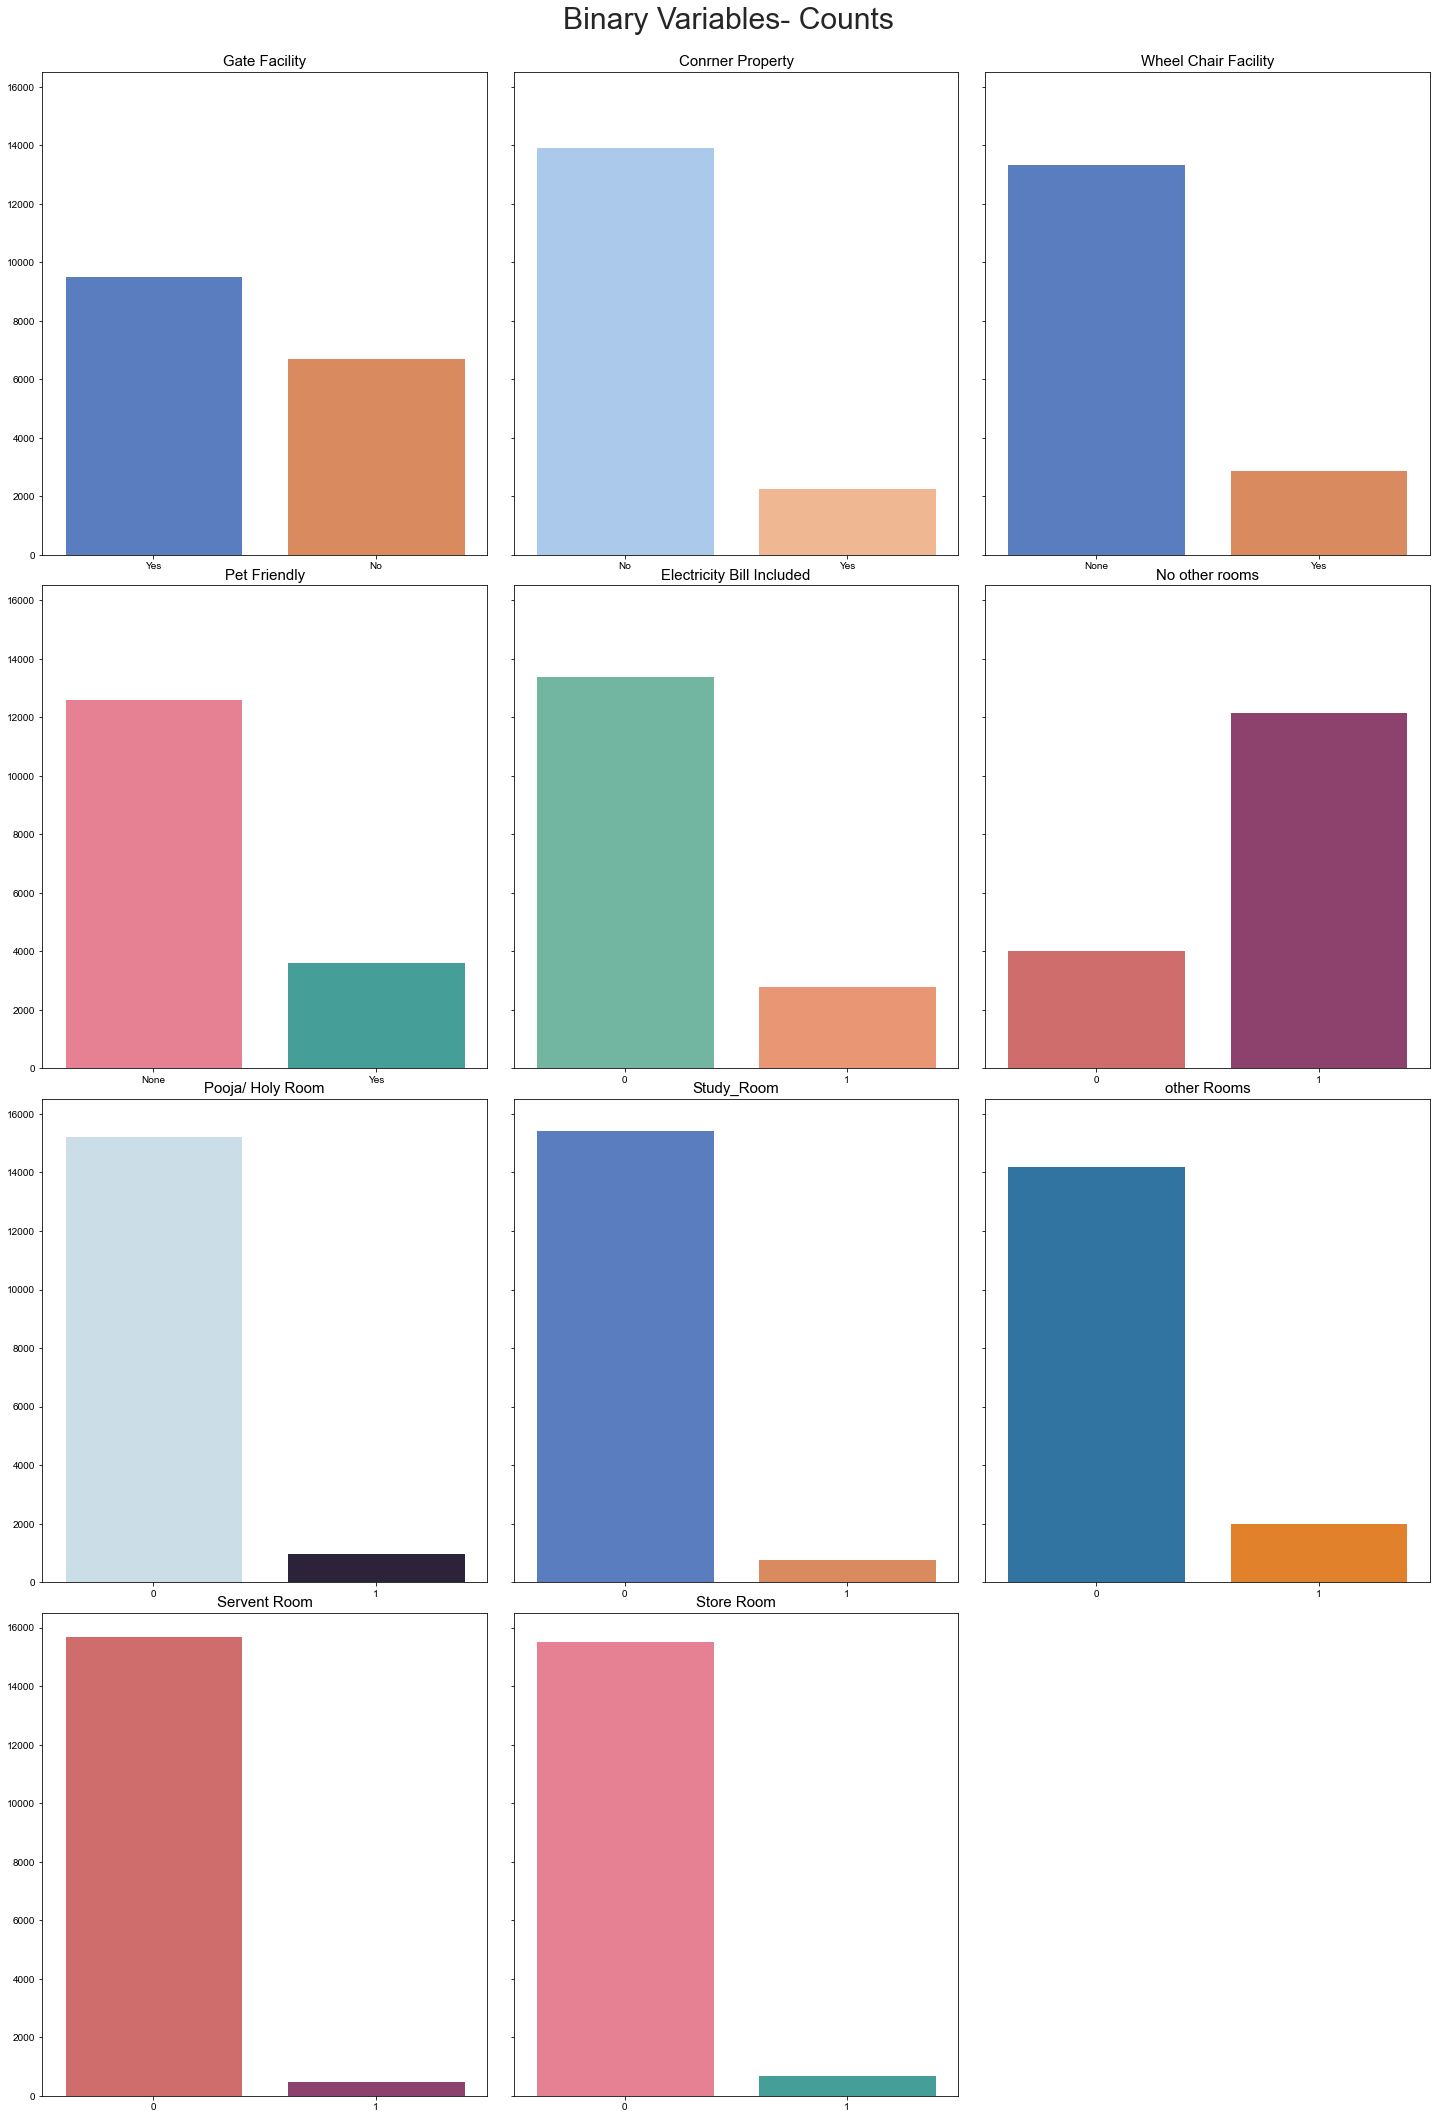

In [17]:
fig, ax = plt.subplots(4,3, figsize = (20,30), sharey = True)
fig.tight_layout()
fig.subplots_adjust(top=0.95)

sns.set_style('white')
fig.suptitle('Binary Variables- Counts', size = 30)
sns.barplot(ax= ax[0,0], data =X_train , x = X_train.gate_community.value_counts().index, y = X_train.gate_community.value_counts().values,palette= 'muted' )
ax[0,0].set_title('Gate Facility', fontsize = 15)
sns.barplot(ax= ax[0,1], data =X_train , x = X_train.corner_pro.value_counts().index, y = X_train.corner_pro.value_counts().values,palette= 'pastel' )
ax[0,1].set_title('Conrner Property', fontsize = 15)
sns.barplot(ax= ax[0,2], data =X_train , x = X_train.wheelchairadption.value_counts().index, y = X_train.wheelchairadption.value_counts().values,palette= 'muted' )
ax[0,2].set_title('Wheel Chair Facility',   fontsize = 15)
sns.barplot(ax= ax[1,0], data =X_train , x = X_train.petfacility.value_counts().index, y = X_train.petfacility.value_counts().values,palette= 'husl' )
ax[1,0].set_title('Pet Friendly',  fontsize = 15)
sns.barplot(ax= ax[1,1], data =X_train , x = X_train.lightbill.value_counts().index, y = X_train.lightbill.value_counts().values,palette= 'Set2' )
ax[1,1].set_title('Electricity Bill Included',  fontsize = 15)
sns.barplot(ax= ax[1,2], data =X_train , x = X_train.no_room.value_counts().index, y = X_train.no_room.value_counts().values,palette= 'flare' )
ax[1,2].set_title('No other rooms',  fontsize = 15)
sns.barplot(ax= ax[2,0], data =X_train , x = X_train.pooja_room.value_counts().index, y = X_train.pooja_room.value_counts().values,palette= 'ch:s=.25,rot=-.25' )
ax[2,0].set_title('Pooja/ Holy Room',  fontsize = 15)
sns.barplot(ax= ax[2,1], data =X_train , x = X_train.study_room.value_counts().index, y = X_train.study_room.value_counts().values,palette= 'muted' )
ax[2,1].set_title('Study_Room',  fontsize = 15)
sns.barplot(ax= ax[2,2], data =X_train , x = X_train.others.value_counts().index, y = X_train.others.value_counts().values )
ax[2,2].set_title('other Rooms',  fontsize = 15)
sns.barplot(ax= ax[3,0], data =X_train , x = X_train.servant_room.value_counts().index, y = X_train.servant_room.value_counts().values,palette= 'flare' )
ax[3,0].set_title('Servent Room',  fontsize = 15)
sns.barplot(ax= ax[3,1], data =X_train , x = X_train.store_room.value_counts().index, y = X_train.store_room.value_counts().values,palette= 'husl' )
ax[3,1].set_title('Store Room',  fontsize = 15)
fig.delaxes(ax[3][2])


## Binary Variables vs Rent

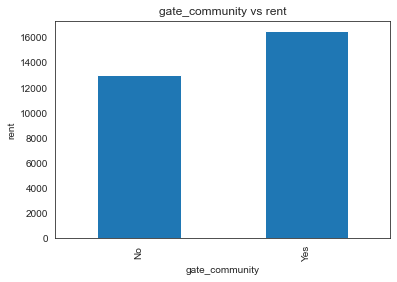

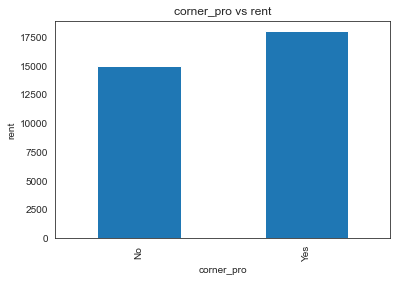

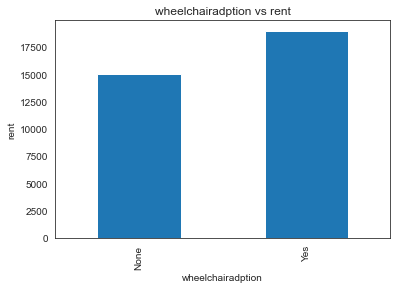

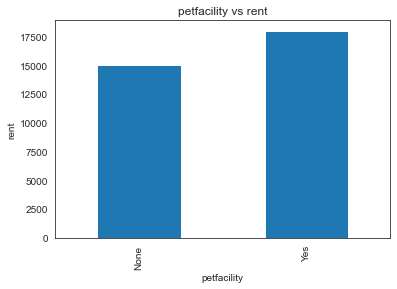

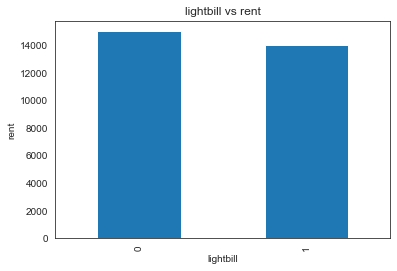

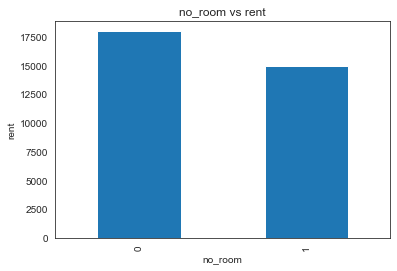

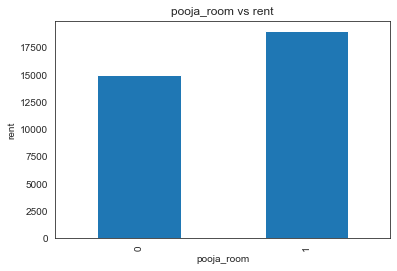

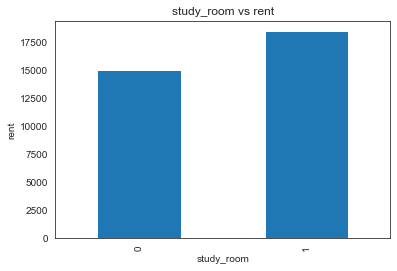

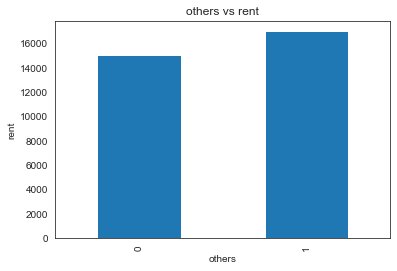

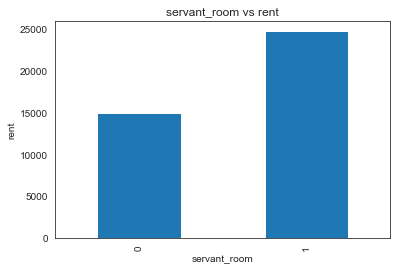

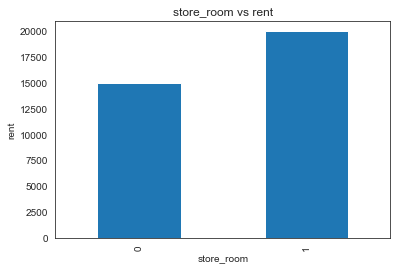

In [18]:
for feature in binary_variables:
    X_train.groupby(feature)[target_variable].median().plot.bar()
    
    plt.xlabel(feature)
    plt.ylabel(target_variable)
    plt.title('{} vs {}'.format(feature, target_variable))
    plt.show()

In [19]:
X_train.groupby('bedroom').count()
X_train.drop(X_train[X_train['bedroom']>= 6].index, axis = 0, inplace = True)

## Ordinal Variable vs Target Variable

Text(0.5, 1.0, 'Property Age')

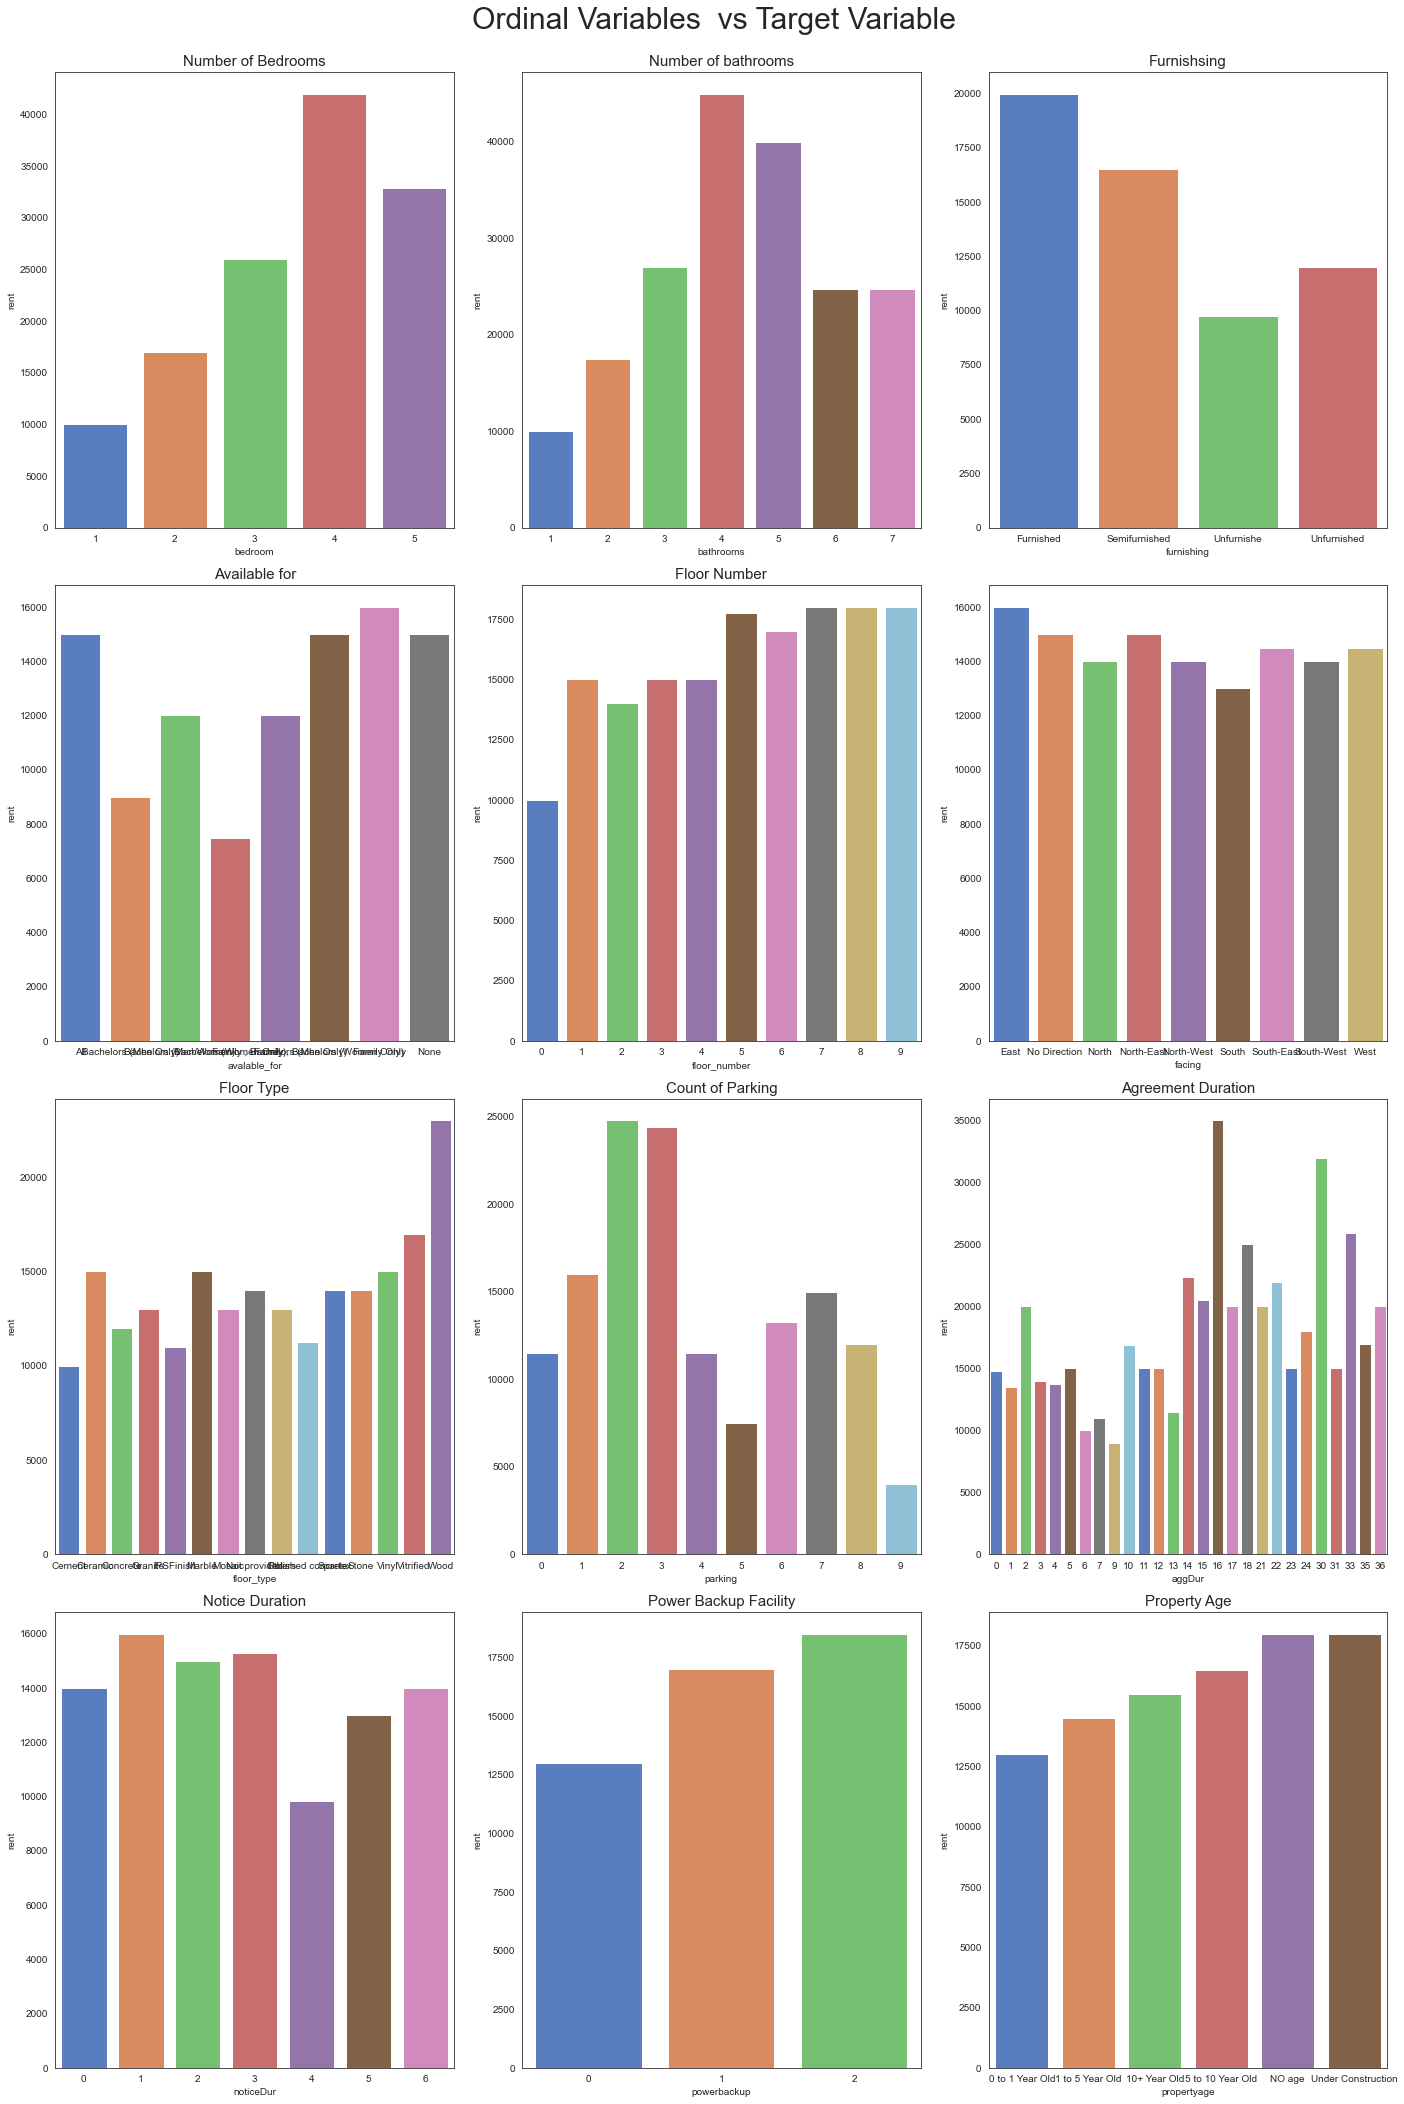

In [20]:
fig, ax = plt.subplots(4,3, figsize = (20,30), sharey = False)
fig.tight_layout(pad= 4.0)
fig.subplots_adjust(top=0.95)

sns.set_style('white')
fig.suptitle('Ordinal Variables  vs Target Variable', size = 30)
sns.barplot(ax= ax[0,0], data =X_train , x = X_train.groupby('bedroom').median().index, y =X_train.groupby('bedroom').median().rent,palette= 'muted' )
ax[0,0].set_title('Number of Bedrooms', fontsize = 15)

sns.barplot(ax= ax[0,1], data =X_train , x = X_train.groupby('bathrooms').median().index, y =X_train.groupby('bathrooms').median().rent,palette= 'muted' )
ax[0,1].set_title('Number of bathrooms', fontsize = 15)

sns.barplot(ax= ax[0,2], data =X_train , x = X_train.groupby('furnishing').median().index, y =X_train.groupby('furnishing').median().rent,palette= 'muted' )
ax[0,2].set_title('Furnishsing', fontsize = 15)

sns.barplot(ax= ax[1,0], data =X_train , x = X_train.groupby('avalable_for').median().index, y =X_train.groupby('avalable_for').median().rent,palette= 'muted' )
ax[1,0].set_title('Available for', fontsize = 15)

sns.barplot(ax= ax[1,1], data =X_train , x = X_train.groupby('floor_number').median().index, y =X_train.groupby('floor_number').median().rent,palette= 'muted' )
ax[1,1].set_title('Floor Number', fontsize = 15)

sns.barplot(ax= ax[1,2], data =X_train , x = X_train.groupby('facing').median().index, y =X_train.groupby('facing').median().rent,palette= 'muted' )
ax[1,2].set_title('', fontsize = 15)

sns.barplot(ax= ax[2,0], data =X_train , x = X_train.groupby('floor_type').median().index, y =X_train.groupby('floor_type').median().rent,palette= 'muted' )
ax[2,0].set_title('Floor Type', fontsize = 15)

sns.barplot(ax= ax[2,1], data =X_train , x = X_train.groupby('parking').median().index, y =X_train.groupby('parking').median().rent,palette= 'muted' )
ax[2,1].set_title('Count of Parking', fontsize = 15)

sns.barplot(ax= ax[2,2], data =X_train , x = X_train.groupby('aggDur').median().index, y =X_train.groupby('aggDur').median().rent,palette= 'muted' )
ax[2,2].set_title('Agreement Duration', fontsize = 15)

sns.barplot(ax= ax[3,0], data =X_train , x = X_train.groupby('noticeDur').median().index, y =X_train.groupby('noticeDur').median().rent,palette= 'muted' )
ax[3,0].set_title('Notice Duration', fontsize = 15)

sns.barplot(ax= ax[3,1], data =X_train , x = X_train.groupby('powerbackup').median().index, y =X_train.groupby('powerbackup').median().rent,palette= 'muted' )
ax[3,1].set_title('Power Backup Facility', fontsize = 15)

sns.barplot(ax= ax[3,2], data =X_train , x = X_train.groupby('propertyage').median().index, y =X_train.groupby('propertyage').median().rent,palette= 'muted' )
ax[3,2].set_title('Property Age', fontsize = 15)

# Feature Selection

In [21]:
X_train.address.head()

0    Sadguru hights, Pingale Wasti, , Pune, Maharas...
1    Manav Silver Springs, Wagholi, , Pune, Maharas...
2    Saarrthi Souvenir, Mahalunge, , Pune, Maharashtra
3        Dhan Residency, Wanowrie, , Pune, Maharashtra
4    Saptsiddhi Savali Homes, Uruli Devachi, , Pune...
Name: address, dtype: object

In [22]:
locality = []
for i in X_train.address:
    address = i.split(',')
    address = [x.lower() for x in address]

    if len(address) == 4:
        locality.append(address[0])
    elif len(address) == 5:
        locality.append(address[1])
    elif len(address)  == 6:
        if len(address[1]) == 1:
            locality.append(address[2])
        else:
            locality.append(address[1])
    elif len(address) == 7:
        if address[2].lower() == address[3].lower():
            locality.append(address[2])
        else:
            locality.append(' '.join(address[2:4]))
    elif len(address) == 8:
        if address[2].lower() == 'pune':
            locality.append(address[1])
        else:
            locality.append(address[2])
    else:
        locality.append(address[4])

In [23]:
X_train['locality'] = locality
location_summary = X_train['locality'].value_counts()
location_summary

 wagholi                                      656
 hinjewadi                                    608
 hadapsar                                     523
 wakad                                        513
 kharadi                                      421
                                             ... 
 balewadi  patil nagar                          1
chandrika society near chandralok hospital      1
 behind bharati vidhyapeeth katraj              1
rajmata jijau colony                            1
 kadolkar colony  talegaon dabhade              1
Name: locality, Length: 1782, dtype: int64

In [24]:
continous_variables = continous_variables[0:1] + continous_variables[3:]

In [25]:
X_train.drop(X_train[X_train['area'] > 15000].index, axis = 0, inplace = True)

In [26]:
X_train.drop(X_train[X_train['avalable_for'] == "None"].index, inplace = True)

In [27]:
X_train.drop(X_train[X_train['propertyage'] == "NO age"].index, inplace = True)

In [28]:
X_train.drop(['mnt_amt', 'maintenance_amt', 'brok_amt', 'deposit_amt', 'address'], axis = 1, inplace = True)

In [29]:
X_train.drop(['bathrooms'], axis = 1, inplace = True)

In [30]:
X_train.drop(['aggDur'], axis = 1, inplace = True)

<AxesSubplot:>

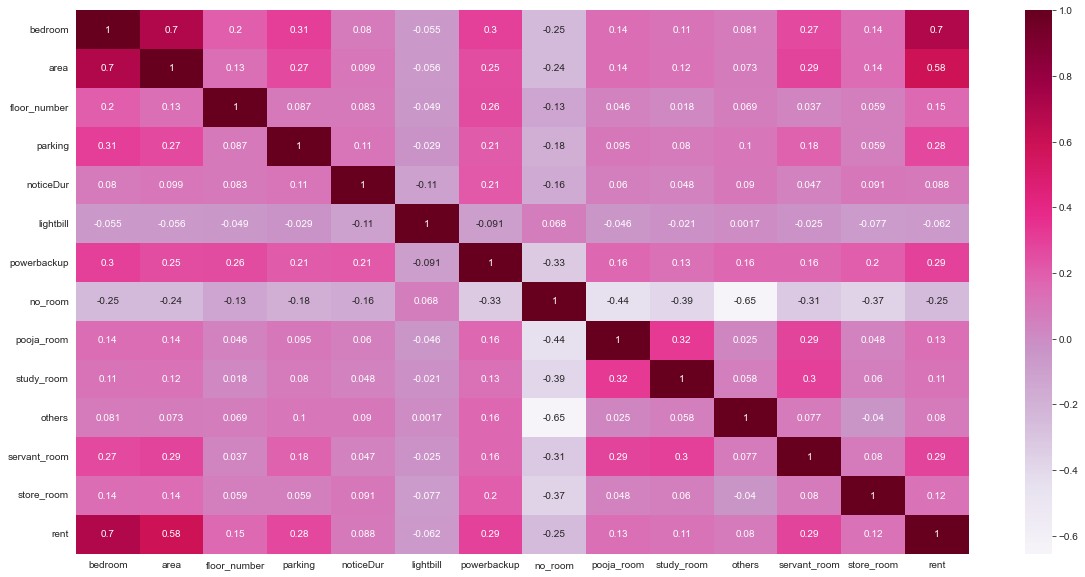

In [31]:
plt.figure(figsize= (20,10))

sns.heatmap(X_train.corr(), annot = True, cmap = 'PuRd')

In [32]:
X_train.head()

,bedroom,area,furnishing,avalable_for,floor_number,facing,floor_type,gate_community,corner_pro,parking,...,powerbackup,propertyage,no_room,pooja_room,study_room,others,servant_room,store_room,rent,locality
0,2,1050.0,Unfurnished,All,5,West,Marble,Yes,No,0,...,2,5 to 10 Year Old,1,0,0,0,0,0,20000.0,pingale wasti
1,2,760.0,Unfurnished,All,5,East,Vitrified,Yes,Yes,2,...,2,1 to 5 Year Old,1,0,0,0,0,0,14000.0,wagholi
2,3,1100.0,Semifurnished,All,1,South-West,Vitrified,Yes,No,1,...,2,1 to 5 Year Old,0,0,0,1,0,0,22999.0,mahalunge
3,1,628.0,Furnished,Family Only,3,East,Mosaic,Yes,No,1,...,0,10+ Year Old,1,0,0,0,0,0,13000.0,wanowrie
4,2,668.0,Semifurnished,"Family , Bachelors (Men Only)",6,South,Polished concrete,Yes,Yes,1,...,1,1 to 5 Year Old,1,0,0,0,0,0,7500.0,uruli devachi


In [34]:
ordinal_variables = ordinal_variables[:1] + ordinal_variables[2:]

In [35]:
ordinal_variables.append('locality')

In [36]:
ordinal_variables

['bedroom',
 'furnishing',
 'avalable_for',
 'floor_number',
 'facing',
 'floor_type',
 'parking',
 'noticeDur',
 'powerbackup',
 'propertyage',
 'locality']

In [37]:
binary_variables

['gate_community',
 'corner_pro',
 'wheelchairadption',
 'petfacility',
 'lightbill',
 'no_room',
 'pooja_room',
 'study_room',
 'others',
 'servant_room',
 'store_room']

In [38]:
X_train.locality = X_train.locality.apply(lambda x: x.strip())

In [39]:
locality_stats = X_train['locality'].value_counts()
locality_stats

wagholi                              671
hinjewadi                            609
hadapsar                             571
wakad                                527
kharadi                              474
                                    ... 
nair colony                            1
shankar kalat nagar  wakad             1
dadachi wasti  audumbar colony         1
balewadi  patil nagar                  1
kadolkar colony  talegaon dabhade      1
Name: locality, Length: 1452, dtype: int64

In [40]:
locality_stat_less_than_10 = locality_stats[locality_stats <= 10]
locality_stat_less_than_10
X_train.locality = X_train.locality.apply(lambda x: 'other' if x in locality_stat_less_than_10 else x)
len(X_train.locality.unique())

207

In [41]:
df = X_train.copy()

In [42]:
dummy = X_train.copy()

In [43]:
dummy.drop(['locality'], axis = 1, inplace = True)

In [44]:
dummy = pd.get_dummies(dummy, drop_first=True)

In [45]:
dummy_df = pd.get_dummies(X_train['locality'], prefix='locality')

In [46]:
dummy_df.drop(['locality_other'], axis = 1, inplace = True)

In [47]:
X_dummy = pd.concat([dummy, dummy_df], axis=1)

In [48]:
from sklearn.preprocessing import LabelEncoder
cols = ['furnishing','avalable_for','facing','floor_type','locality','gate_community','corner_pro','wheelchairadption','petfacility','propertyage']
df[cols] = df[cols].apply(LabelEncoder().fit_transform)
df.head(n=10)

,bedroom,area,furnishing,avalable_for,floor_number,facing,floor_type,gate_community,corner_pro,parking,...,powerbackup,propertyage,no_room,pooja_room,study_room,others,servant_room,store_room,rent,locality
0,2,1050.0,3,0,5,8,5,1,0,0,...,2,3,1,0,0,0,0,0,20000.0,137
1,2,760.0,3,0,5,0,13,1,1,2,...,2,1,1,0,0,0,0,0,14000.0,195
2,3,1100.0,1,0,1,7,13,1,0,1,...,2,1,0,0,0,1,0,0,22999.0,98
3,1,628.0,0,6,3,0,6,1,0,1,...,0,2,1,0,0,0,0,0,13000.0,199
4,2,668.0,1,4,6,5,9,1,1,1,...,1,1,1,0,0,0,0,0,7500.0,186
5,2,950.0,1,6,1,1,1,0,0,1,...,2,1,1,0,0,0,0,0,17000.0,15
6,3,1530.0,1,6,2,0,13,1,0,2,...,2,1,0,1,0,0,0,0,28000.0,17
8,3,1100.0,1,6,7,2,7,1,0,1,...,0,1,0,0,0,1,1,0,35000.0,82
9,3,1400.0,3,0,2,4,13,1,0,1,...,2,3,0,1,0,0,0,0,25999.0,97
10,2,735.0,1,6,3,6,7,1,0,1,...,0,2,1,0,0,0,0,0,17000.0,123


In [49]:
from scipy import stats
zscore = np.abs(stats.zscore(df))
print(zscore)

       bedroom      area  furnishing  avalable_for  floor_number    facing  \
0     0.279348  0.627019    1.084378      0.977455      0.803365  2.425623   
1     0.279348  0.024176    1.084378      0.977455      0.803365  0.745296   
2     1.609182  0.739294    0.595496      0.977455      0.860339  2.029258   
3     1.050485  0.320582    1.435433      1.095695      0.028487  0.745296   
4     0.279348  0.230762    0.595496      0.404645      1.219291  1.236528   
...        ...       ...         ...           ...           ...       ...   
5356  0.279348  0.080313    1.084378      0.977455      0.444413  0.745296   
5357  1.050485  0.787646    1.084378      0.631930      1.276265  0.348931   
5358  1.609182  1.188394    0.595496      0.977455      0.803365  0.840163   
5359  1.609182  1.525219    1.084378      0.977455      2.467069  1.632893   
5360  0.279348  0.177919    1.435433      0.977455      0.387439  0.047434   

      floor_type  gate_community  corner_pro   parking  ...  po

In [50]:
df = df[(zscore<3).all(axis=1)]

In [51]:
df

,bedroom,area,furnishing,avalable_for,floor_number,facing,floor_type,gate_community,corner_pro,parking,...,powerbackup,propertyage,no_room,pooja_room,study_room,others,servant_room,store_room,rent,locality
0,2,1050.0,3,0,5,8,5,1,0,0,...,2,3,1,0,0,0,0,0,20000.0,137
1,2,760.0,3,0,5,0,13,1,1,2,...,2,1,1,0,0,0,0,0,14000.0,195
2,3,1100.0,1,0,1,7,13,1,0,1,...,2,1,0,0,0,1,0,0,22999.0,98
3,1,628.0,0,6,3,0,6,1,0,1,...,0,2,1,0,0,0,0,0,13000.0,199
4,2,668.0,1,4,6,5,9,1,1,1,...,1,1,1,0,0,0,0,0,7500.0,186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5355,2,1028.0,3,0,4,0,5,1,1,1,...,2,0,1,0,0,0,0,0,25000.0,52
5356,2,735.0,3,0,2,0,5,1,0,0,...,0,0,1,0,0,0,0,0,14000.0,51
5357,1,420.0,3,1,0,1,7,0,0,0,...,0,3,1,0,0,0,0,0,10000.0,73
5359,3,1450.0,3,0,9,6,13,1,0,1,...,2,3,0,0,0,1,0,0,33000.0,9


In [52]:
X_dummy.head()

,bedroom,area,floor_number,parking,noticeDur,lightbill,powerbackup,no_room,pooja_room,study_room,...,locality_wakadkar wasti,locality_walhekarwadi,locality_wanowrie,locality_wanwadi,locality_warje,locality_warje malwadi,locality_wireless colony,locality_yamuna nagar,locality_yerwada,locality_yewalewadi
0,2,1050.0,5,0,2,0,2,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,760.0,5,2,1,0,2,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1100.0,1,1,1,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,628.0,3,1,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,2,668.0,6,1,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


# Model Training

In [53]:
y = df['rent']
X = df.drop(['rent'],axis=True)


In [54]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((10642, 23), (2661, 23), (10642,), (2661,))

In [55]:
scaler = preprocessing.RobustScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [57]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
feature_sel_model = SelectFromModel(Lasso(alpha = 0.005, random_state = 0))
feature_sel_model.fit(x_train_scaled, y_train) 

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [61]:
selected_features = x_train.columns[(feature_sel_model.get_support())]

print('total features:', x_train.shape[1])
print('selected features:', len(selected_features))
print('features with coefficients shrunk to 0:', np.sum(feature_sel_model.estimator_.coef_ == 0))
print('Selected Features:\n', selected_features)


total features: 23
selected features: 18
features with coefficients shrunk to 0: 4
Selected Features:
 Index(['bedroom', 'area', 'furnishing', 'avalable_for', 'floor_number',
       'facing', 'floor_type', 'gate_community', 'corner_pro', 'parking',
       'wheelchairadption', 'petfacility', 'noticeDur', 'lightbill',
       'powerbackup', 'propertyage', 'no_room', 'locality'],
      dtype='object')


In [64]:
X_lasso = X[selected_features]

In [69]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score

In [70]:
scores = []

for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X_lasso, y, test_size = 0.2)
    
    model = XGBRegressor()
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))

print(np.mean(scores))

0.7175760262185139


In [ ]:
model = XGBRegressor()
model.fit(x_train_scaled, y_train)
print(model.score(x_test_scaled, y_test))

0.7161209831125182


In [ ]:
scores = []

for i in range(10):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
    scaler = preprocessing.RobustScaler()
    x_train = scaler.fit_transform(x_train)
    x_test = scaler.transform(x_test)
    model = LinearRegression()
    model.fit(x_train, y_train)
    scores.append(model.score(x_test, y_test))

print(np.mean(scores))

0.5746754104686673


In [ ]:
scorez = []

for i in range(10):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
    scaler = preprocessing.RobustScaler()
    x_train = scaler.fit_transform(x_train)
    x_test = scaler.transform(x_test)
    model = XGBRegressor()
    model.fit(x_train, y_train)
    scorez.append(model.score(x_test, y_test))

print(np.mean(scorez))

0.7244370912698451
